In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [49]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [51]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [52]:
gender_mapping = {'Female': 0, 'Male': 1}
df1 = df
df1['Gender'] = df1['Gender'].map(gender_mapping)
df1

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [53]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


We can see that Age and Estimated Salary are highly correlated to Purchased.

In [57]:
X = df.iloc[:, 2:4] #only including Age and Estimated Salary
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [58]:
y = df.Purchased.values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [59]:
y.shape

(400,)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train

,Age,EstimatedSalary
220,41,80000
393,60,42000
259,45,131000
162,37,33000
135,23,63000
...,...,...
360,43,129000
254,50,44000
229,42,80000
23,45,22000


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 

In [63]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 3.01441503e-01,  3.64860426e-01],
       [ 2.13237491e+00, -7.88428572e-01],
       [ 6.86901168e-01,  1.91269566e+00],
       [-8.40181612e-02, -1.06157597e+00],
       [-1.43312699e+00, -1.51084652e-01],
       [ 3.97806419e-01,  2.45899045e+00],
       [-1.33676207e+00, -1.48647191e+00],
       [-2.76747993e-01, -7.27729151e-01],
       [ 8.79631000e-01, -1.15262510e+00],
       [ 9.75995916e-01, -1.18297481e+00],
       [ 9.75995916e-01,  1.91269566e+00],
       [-1.14403224e+00, -1.00087655e+00],
       [-9.51302406e-01, -3.93882336e-01],
       [ 3.01441503e-01, -5.15281178e-01],
       [-1.91495157e+00, -4.84931468e-01],
       [ 1.55418541e+00,  6.13633209e-02],
       [ 1.93964508e+00, -9.09827414e-01],
       [ 3.01441503e-01,  1.22062742e-01],
       [ 1.55418541e+00,  1.09325348e+00],
       [-1.62585682e+00,  1.22062742e-01],
       [-8.54937490e-01,  3.64860426e-01],
       [-8.40181612e-02,  2.73811294e-01],
       [-6.62207658e-01, -6.00355210e-02],
       [ 1.

In [68]:
X_train.shape[0]

320

In [64]:
#1st method of finding k
np.sqrt(X_train.shape[0])



17.88854381999832

In [70]:
k = 17 #always select odd value


In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=17)

In [72]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)


0.9

In [75]:
confusion_matrix(y_test, y_pred)


array([[44,  5],
       [ 3, 28]], dtype=int64)

In [80]:
error_train = []
error_test = []

for i in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    x = confusion_matrix(y_train, knn.predict(X_train))
    y = confusion_matrix(y_test, knn.predict(X_test))
    error_train.append(x[0][1]+x[1][0]/x.sum())
    error_test.append(y[0][1]+y[1][0]/y.sum())


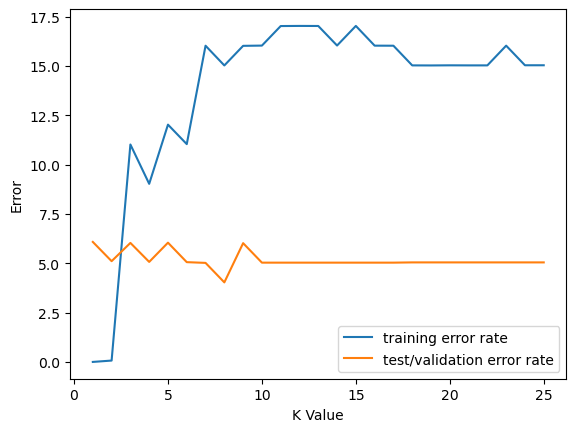

In [81]:

plt.plot(range(1,26), error_train, label = 'training error rate')
plt.plot(range(1,26), error_test, label = 'test/validation error rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()


In [82]:
accuracy = []
for i in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, knn.predict(X_test)))

accuracy

[0.8375,
 0.825,
 0.8875,
 0.8625,
 0.875,
 0.875,
 0.9125,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875]

In [83]:
np.argmax(accuracy)

6

at 6th index we have highest accuracy = 0.9125 or 91.25%

In [86]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)


0.875

In [105]:
def predict_output():
    age = int(input("Enter age: "))
    salary = int(input("Enter salary: "))

    print(f'You entered:\nage: {age}\nsalary: {salary}')
    print(np.array([[age],[salary]]).shape)
    
    X_new = np.array([[age],[salary]]).reshape(1,2)
    X_new = scaler.transform(X_new)
    
    if knn.predict(X_new)[0] == 0:
        return "Will not purchase"
    else:
        return "Will purchase"


In [104]:
predict_output()

You entered:
age: 44
salary: 23000
(2, 1)


c:\Users\Shaheryar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Will purchase'

In [106]:
predict_output()

You entered:
age: 22
salary: 20000
(2, 1)


c:\Users\Shaheryar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Will not purchase'